Document 객체로 로드
-page_content 내용, metadata 메타데이터를 나타내는 딕셔너리

In [ ]:
from langchain_core.documents import Document

document = Document("안녕하세요? 이건 랭체인의 도큐먼드 입니다")

In [ ]:
# 도큐먼트의 속성 확인
document.__dict__

In [ ]:
from google.colab import files

# 1. 파일 업로드 (실행 후 '파일 선택' 버튼이 뜨면 PDF를 클릭하세요)
uploaded = files.upload()

# 2. 업로드된 파일명 가져오기 (자동으로 감지)
FILE_PATH = list(uploaded.keys())[0]

In [ ]:
!pip install langchain-community pypdf

In [ ]:
from langchain_community.document_loaders import PyPDFLoader

# 로더 설정
loader = PyPDFLoader(FILE_PATH)

load()

문서를 로드하여 반환합니다.
반환된 결과는 List[Document] 형태

In [ ]:
# PDF 로더
docs = loader.load()

# 로드된 문서의 수 확인
len(docs)

In [ ]:
# 첫번째 문서 확인
docs[0]

load_and_split()

splitter 를 사용하여 문서를 분할하고 반환합니다.
반환된 결과는 List[Document] 형태입니다.

In [ ]:
from langchain_text_splitters import CharacterTextSplitter

# 문열 분할기 설정
text_splitter = CharacterTextSplitter(chunk_size=200, chunk_overlap=0)
# 문서 분할
docs = loader.load_and_split(text_splitter=text_splitter)

# 로드된 문서의 수 확인
len(docs)
# 첫번째 문서 확인
docs[0]


lazy_load()

generator 방식으로 문서를 로드합니다. <-  ?

In [ ]:
# generator 방식으로 문서 로드
for doc in loader.lazy_load():
    print(doc.metadata)

aload() -> 어떤 상황에 사용?

비동기(Async) 방식의 문서 로드

In [ ]:
# 문서를 async 방식으로 로드
adocs = loader.aload()

In [ ]:
# 문서 로드
await adocs

## PDF
이 형식은 다운스트림에서 사용됩니다.->?
LangChain에는 PDF 파서가 여러 종류 있는데 일부는 저수준이고 일부는 OCR, 이미지 등을 지원함.

Q. PDF loader가 주제?분야?에 따라 성능 순위가 달라진 이유가 뭘까?
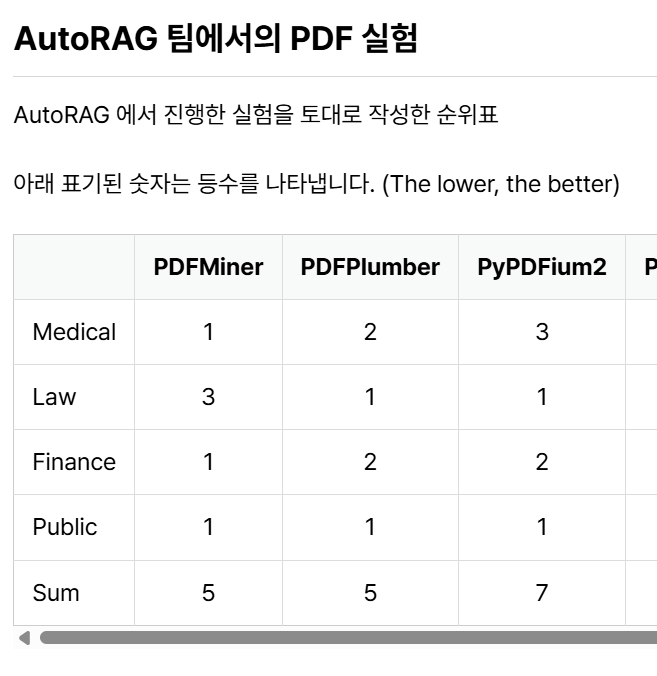

In [ ]:
from google.colab import userdata
import os

# 코랩에 저장된 키를 불러와서 환경변수로 설정
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

In [ ]:
def show_metadata(docs):
    if docs:
        print("[metadata]")
        print(list(docs[0].metadata.keys()))
        print("\n[examples]")
        max_key_length = max(len(k) for k in docs[0].metadata.keys())
        for k, v in docs[0].metadata.items():
            print(f"{k:<{max_key_length}} : {v}")


- PyPDF: PDF를 문서 배열로 로드
- PyPDF(OCR): rapidocr-onnxruntime 패키지를 사용하여 **이미지에서 텍스트를 추출**
- PyMuPDF: 속도 최적화, 자세한 메타데이터를 포함, 페이지 당 하나의 문서를 반환
- Unstructured: Markdown이나 PDF와 같은 비구조화된 또는 반구조화된 파일 형식을 다루기 위한 공통 인터페이스를 지원함. LangChain의 UnstructuredPDFLoader는 Unstructured와 통합되어 PDF 문서를 LangChain Document 객체로 파싱합니다.
- PyPDFium2
- PDFMiner -> PDFMiner를 사용하여 HTML 텍스트 생성

  이 방법은 출력된 HTML 콘텐츠를 BeautifulSoup을 통해 파싱함으로써 글꼴 크기, 페이지 번호, PDF 헤더/푸터 등에 대한 보다 구조화되고 풍부한 정보를 얻을 수 있게 하여 텍스트를 의미론적으로 섹션으로 분할하는 데 도움이 될 수 있습니다.

- PyPDF 디렉토리: 디렉토리에서 PDF를 로드= 파일 하나하나를 일일이 지정하는 게 아니라, 폴더에서 파일을 전부다 가져옴
- PDFPlumber: PyMuPDF와 마찬가지로, 출력 문서는 PDF와 그 페이지에 대한 자세한 메타데이터를 포함하며, 페이지 당 하나의 문서를 반환

## HWP (한글)

LangChain 에는 아직 없음!! 직접 구현한 HWPLoader 를 사용해야 함

## CSV


In [ ]:
from langchain_community.document_loaders.csv_loader import CSVLoader

# CSV 로더 생성
loader = CSVLoader(file_path="./data/titanic.csv")

# 데이터 로드
docs = loader.load()

print(len(docs))
print(docs[0].metadata)


## Excel